In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import io
#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CoronaTweetsSentimentAnalysis.csv to CoronaTweetsSentimentAnalysis.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CoronaTweetsSentimentAnalysis.csv']))

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [ ]:
df.shape

(1988, 6)

In [ ]:
df.isnull().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [ ]:
df.nunique()

UserName         1988
ScreenName       1988
Location         1019
TweetAt            14
OriginalTweet    1988
Sentiment           2
dtype: int64

In [ ]:
df = df.drop(['UserName'],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ScreenName     1988 non-null   int64 
 1   Location       1536 non-null   object
 2   TweetAt        1988 non-null   object
 3   OriginalTweet  1988 non-null   object
 4   Sentiment      1988 non-null   object
dtypes: int64(1), object(4)
memory usage: 77.8+ KB


LABEL ENCODING

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sentiment']= le.fit_transform(df['Sentiment'])
  
df['Sentiment'].unique()

# Positive - 1
# Negative - 0

array([1, 0])

Change datatype to reduce memory

In [ ]:
df['ScreenName'] = df['ScreenName'].astype(np.int64)
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
df['Sentiment'] = df['Sentiment'].astype(np.int8)

In [ ]:
df['Sentiment'].value_counts()

0    1041
1     947
Name: Sentiment, dtype: int64

[Text(0, 0.5, 'COUNT'), Text(0.5, 0, 'CLASS')]

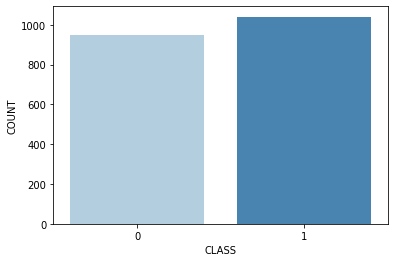

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bar = sns.barplot(x = df['Sentiment'],
            y = df['Sentiment'].value_counts(),
            data = df,
            palette = "Blues")
bar.set(xlabel='CLASS', ylabel='COUNT')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ScreenName     1988 non-null   int64         
 1   Location       1536 non-null   object        
 2   TweetAt        1988 non-null   datetime64[ns]
 3   OriginalTweet  1988 non-null   object        
 4   Sentiment      1988 non-null   int8          
dtypes: datetime64[ns](1), int64(1), int8(1), object(2)
memory usage: 64.2+ KB


CHANGING DATATYPE TO REDUCE MEMORY

In [ ]:
loc = df['Location'].value_counts()

In [ ]:
x =loc.head(10)
x

United States       42
London, England     25
Washington, DC      22
New York, NY        20
Los Angeles, CA     16
Canada              15
London              14
Atlanta, GA         12
California, USA     12
Toronto, Ontario    11
Name: Location, dtype: int64

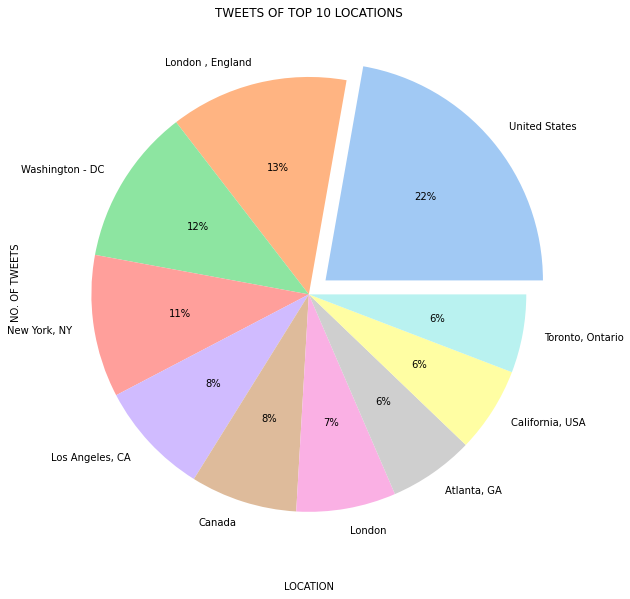

In [ ]:
plt.figure(figsize=(10,10))  
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
labels = ['United States' ,'London , England' ,'Washington - DC', 'New York, NY' ,'Los Angeles, CA ','Canada', 'London', 'Atlanta, GA', 'California, USA', 'Toronto, Ontario']
palette_color = sns.color_palette('pastel')
plt.xlabel('\nLOCATION')
plt.ylabel('        NO. OF TWEETS\n')
plt.title('TWEETS OF TOP 10 LOCATIONS')
# plotting data on chart
plt.pie(x, labels = labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.show()

In [ ]:
df['OriginalTweet'].head()

0    When I couldn't find hand sanitizer at Fred Me...
1    #Panic buying hits #NewYork City as anxious sh...
2    Voting in the age of #coronavirus = hand sanit...
3    Best quality couches at unbelievably low price...
4    While we were busy watching election returns a...
Name: OriginalTweet, dtype: object

TEXT PREPROCESSING

REMOVE URLS

In [ ]:
df['newtweet'] = df['OriginalTweet'].replace(r'http\S+', ' ', regex=True)

REMOVE PUNCTUATIONS AND SPECIAL CHARACTERS

In [ ]:
df['newtweet'] = df['newtweet'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
df['newtweet'] = df['newtweet'].str.replace('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ')

In [ ]:
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,newtweet,fake
0,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turned amazon ...,find hand sanitizer fred meyer turned amazon ...
1,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hits newyork city anxious shopp...,panic buying hits newyork city anxious shopp...
2,44959,NaN,2020-03-03,Voting in the age of #coronavirus = hand sanit...,1,voting age coronavirus hand sanitizer supert...,voting age coronavirus hand sanitizer supert...
3,44963,"Boksburg, South Africa",2020-04-03,Best quality couches at unbelievably low price...,1,best quality couches unbelievably low prices a...,best quality couches unbelievably low prices a...
4,44967,"Washington, DC",2020-04-03,While we were busy watching election returns a...,1,busy watching election returns bracing covid o...,busy watching election returns bracing covid o...


In [ ]:
# convert to lowercase
df['newtweet']=df['newtweet'].str.lower()

## removing account names -- basically after @ words -- those are usernames
df['newtweet']=df['newtweet'].apply(lambda x :[t for t in x.split() if not t.startswith('@')] ).apply(lambda x: ' '.join(x))

## removing extra spaces 
df['newtweet']=df['newtweet'].apply(lambda x : x.strip())

In [ ]:
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,newtweet
0,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,1,when i couldn t find hand sanitizer at fred me...
1,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,0,#panic buying hits #newyork city as anxious sh...
2,44959,NaN,2020-03-03,Voting in the age of #coronavirus = hand sanit...,1,voting in the age of #coronavirus hand sanitiz...
3,44963,"Boksburg, South Africa",2020-04-03,Best quality couches at unbelievably low price...,1,best quality couches at unbelievably low price...
4,44967,"Washington, DC",2020-04-03,While we were busy watching election returns a...,1,while we were busy watching election returns a...


In [ ]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=f87f57a3f4745aa858eb5f103718ffa18f21df36a65fe7f367070f5a32e6b5a6
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#Remove the stopwords taken from two libraries - 'stop_words' and 'nltk'
essay_list = df['newtweet']
from stop_words import get_stop_words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_list = set(get_stop_words('en')).union(set(stopwords.words('english')))  #Combining the stop words from both the packages

processed_tweets = []
essay_list = list(essay_list)
for i in essay_list:
    temp = i
    parsed_essay = " ".join([word for word in temp.split() if word not in stop_words_list])
    processed_tweets.append(parsed_essay)
df['newtweet'] = processed_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,newtweet
0,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turned #amazon ...
1,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,0,#panic buying hits #newyork city anxious shopp...
2,44959,NaN,2020-03-03,Voting in the age of #coronavirus = hand sanit...,1,voting age #coronavirus hand sanitizer #supert...
3,44963,"Boksburg, South Africa",2020-04-03,Best quality couches at unbelievably low price...,1,best quality couches unbelievably low prices a...
4,44967,"Washington, DC",2020-04-03,While we were busy watching election returns a...,1,busy watching election returns bracing covid o...


TOKENIZATION

In [ ]:
# create new variable tokenized tweet 
friend = df['newtweet'].apply(lambda x: x.split())

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
token = token.apply(lambda x: [stemmer.lemmatize(i) for i in x])

In [ ]:
#Lemmatize all the words in the essays
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

friend = friend.apply(lambda x: [lmtzr.lemmatize(i) for i in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
friend.head()

0    [find, hand, sanitizer, fred, meyer, turned, a...
1    [panic, buying, hit, newyork, city, anxious, s...
2    [voting, age, coronavirus, hand, sanitizer, su...
3    [best, quality, couch, unbelievably, low, pric...
4    [busy, watching, election, return, bracing, co...
Name: newtweet, dtype: object

In [ ]:
# join tokens into one sentence
for i in range(len(friend)):
    friend[i] = ' '.join(friend[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
df['newtweet']  = friend


In [ ]:
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,newtweet,fake
0,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turned amazon p...,find hand sanitizer fred meyer turned amazon ...
1,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hit newyork city anxious shopper ...,panic buying hits newyork city anxious shopp...
2,44959,NaN,2020-03-03,Voting in the age of #coronavirus = hand sanit...,1,voting age coronavirus hand sanitizer supertue...,voting age coronavirus hand sanitizer supert...
3,44963,"Boksburg, South Africa",2020-04-03,Best quality couches at unbelievably low price...,1,best quality couch unbelievably low price avai...,best quality couches unbelievably low prices a...
4,44967,"Washington, DC",2020-04-03,While we were busy watching election returns a...,1,busy watching election return bracing covid ou...,busy watching election returns bracing covid o...


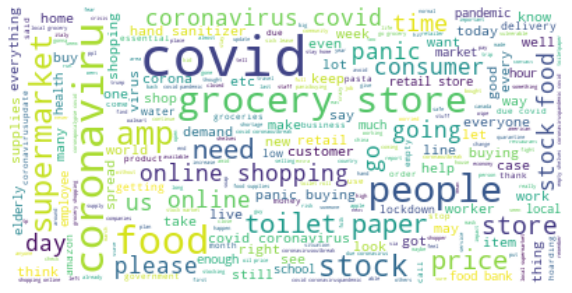

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['newtweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",max_words=len(all_words),max_font_size=40, relative_scaling=.5).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

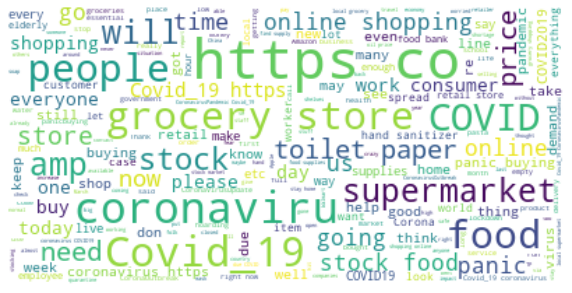

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['OriginalTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",max_words=len(all_words),max_font_size=40, relative_scaling=.5).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
target = df[['newtweet','Sentiment']]

In [ ]:
target.head()

,newtweet,Sentiment
0,find hand sanitizer fred meyer turned amazon p...,1
1,panic buying hit newyork city anxious shopper ...,0
2,voting age coronavirus hand sanitizer supertue...,1
3,best quality couch unbelievably low price avai...,1
4,busy watching election return bracing covid ou...,1


TRAIN AND TEST DATA

In [ ]:
# converting the words into vectors
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokeniser = Tokenizer(num_words=1000, lower=True)
#Create the corpus by finding the most common 
tokeniser.fit_on_texts(df["newtweet"])

In [ ]:
tokens = tokeniser.texts_to_matrix(list(df["newtweet"]))

In [ ]:
print(df.shape)
print(tokens.shape)

(1988, 7)
(1988, 1000)


In [ ]:
#Combining the dataframe with the tokens using pd.concat
full_df = pd.concat([df, pd.DataFrame(tokens)], sort=False, axis=1)
full_df.shape

(1988, 1006)

In [ ]:
#Features selection
X=full_df.drop(["ScreenName","TweetAt","Sentiment", "OriginalTweet", "Location", "newtweet"], axis=1)
y = full_df["Sentiment"]

MODEL FITTING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
full_df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,newtweet,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
0,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turned amazon p...,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hit newyork city anxious shopper ...,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44959,NaN,2020-03-03,Voting in the age of #coronavirus = hand sanit...,1,voting age coronavirus hand sanitizer supertue...,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44963,"Boksburg, South Africa",2020-04-03,Best quality couches at unbelievably low price...,1,best quality couch unbelievably low price avai...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44967,"Washington, DC",2020-04-03,While we were busy watching election returns a...,1,busy watching election return bracing covid ou...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8332135154565061
Validation accuracy Score :  0.6231155778894473
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       309
           1       0.61      0.62      0.61       288

    accuracy                           0.62       597
   macro avg       0.62      0.62      0.62       597
weighted avg       0.62      0.62      0.62       597



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9245147375988497
Validation accuracy Score :  0.6515912897822446
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       312
           1       0.63      0.65      0.64       285

    accuracy                           0.65       597
   macro avg       0.65      0.65      0.65       597
weighted avg       0.65      0.65      0.65       597



In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9626168224299065
Validation accuracy Score :  0.6499162479061976
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       371
           1       0.53      0.69      0.60       226

    accuracy                           0.65       597
   macro avg       0.65      0.66      0.64       597
weighted avg       0.68      0.65      0.66       597

